In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as ah
from sklearn.cluster import KMeans

In [3]:
data=pd.read_csv("CC GENERAL.csv", sep=',')
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
data.drop('CUST_ID', axis=1, inplace=True)

In [5]:
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
data['CREDIT_LIMIT'].fillna(value= data['CREDIT_LIMIT'].mean(), inplace=True)
data['MINIMUM_PAYMENTS'].fillna(value= data['MINIMUM_PAYMENTS'].mean(), inplace=True)
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [7]:
#AGGLOMERATIVE CLUSTERING
model = AgglomerativeClustering(n_clusters=5 , affinity='euclidean' ,linkage='complete')
label = model.fit_predict(data)
predicted_df = pd.DataFrame(label)

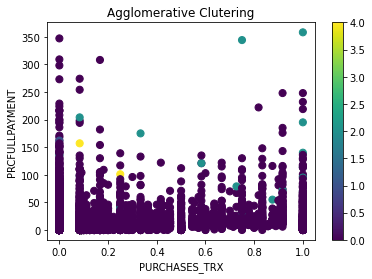

In [9]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['PRC_FULL_PAYMENT'] , data ["PURCHASES_TRX"] , c= predicted_df[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("PURCHASES_TRX")
ax.set_ylabel("PRCFULLPAYMENT")
plt.colorbar(scatter)
plt.show()

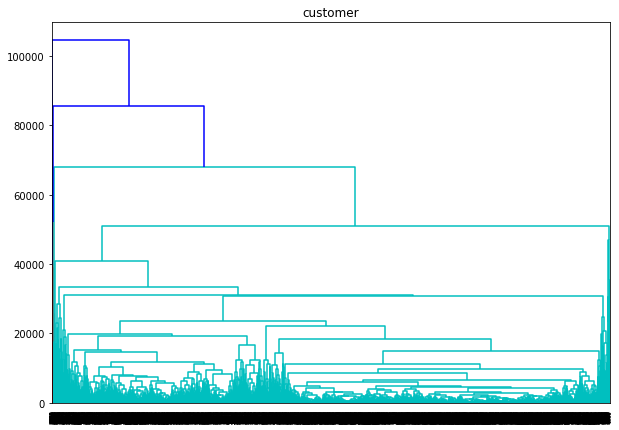

In [11]:
plt.figure( figsize=(10,7))
plt.title('customer')
dend = ah.dendrogram(ah.linkage(data , method='complete'))
plt.show()

In [12]:
#K-MEANS CLUSTERING
model = KMeans(n_clusters=5)
model.fit(data)
predicted_df = pd.DataFrame(model.labels_)
Clus_Cent_ = model.cluster_centers_
data['label'] = predicted_df

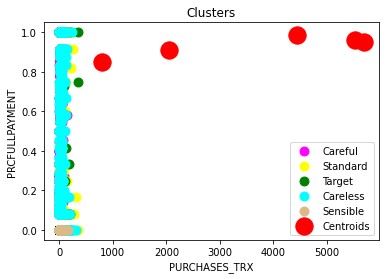

In [13]:
plt.scatter(data["PURCHASES_TRX"][data.label == 0],          
            data["PRC_FULL_PAYMENT"][data.label == 0],s=80,c='magenta',label='Careful')
plt.scatter(data["PURCHASES_TRX"][data.label == 1],
           data["PRC_FULL_PAYMENT"][data.label == 1],s=80,c='yellow',label='Standard')
plt.scatter(data["PURCHASES_TRX"][data.label == 2],
           data["PRC_FULL_PAYMENT"][data.label == 2],s=80,c='green',label='Target')
plt.scatter(data["PURCHASES_TRX"][data.label == 3], 
           data["PRC_FULL_PAYMENT"][data.label == 3],s=80,c='cyan',label='Careless')
plt.scatter(data["PURCHASES_TRX"][data.label == 4], 
           data["PRC_FULL_PAYMENT"][data.label == 4],s=80,c='burlywood',label='Sensible')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('PURCHASES_TRX')
plt.ylabel('PRCFULLPAYMENT')
plt.legend()
plt.show()